# Linear and Logistic Regression

## Linear Regression

### Downloading the dataset

In [1]:
!wget https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv

--2022-02-16 00:39:22--  https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘raw.githubusercontent.com’


### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Reading the data

In [3]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
data.drop(['Unnamed: 0'], axis=1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


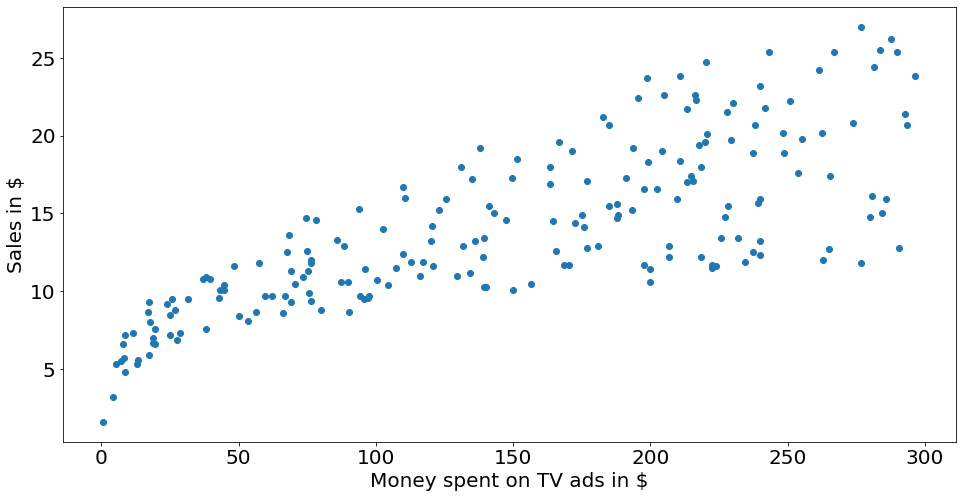

In [6]:
plt.figure(figsize=(16, 8))
plt.rc('font', size=20)
plt.scatter(x=data['TV'], y=data['Sales'])
plt.xlabel("Money spent on TV ads in $")
plt.ylabel("Sales in $")
plt.show()

In [7]:
data['TV'].values

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [8]:
x = data['TV'].values.reshape(-1, 1)
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [9]:
y = data['Sales'].values.reshape(-1, 1)
y

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6],
       [ 8.6],
       [17.4],
       [ 9.2],
       [ 9.7],
       [19. ],
       [22.4],
       [12.5],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [12.5],
       [ 5.6],
       [15.5],
       [ 9.7],
       [12. ],
       [15. ],
       [15.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [ 9.6],
       [17.4],
       [ 9.5],
       [12.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [12.9],
       [ 8.5],
       [14.9],
       [10.6],
       [23.2],
       [14.8],
       [ 9.7],
       [11.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [15.7],
       [14. ],
       [18. ],
       [ 9.3],
       [ 9

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [11]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [12]:
print("Slope: ", reg.coef_[0][0])
print("Intercept: ", reg.intercept_[0])
print("The linear model is: y = {:.5} + {:.5}x".format(reg.intercept_[0], reg.coef_[0][0]))

Slope:  0.0483713041715326
Intercept:  6.820608217642094
The linear model is: y = 6.8206 + 0.048371x


In [13]:
predictions = reg.predict(x_test)

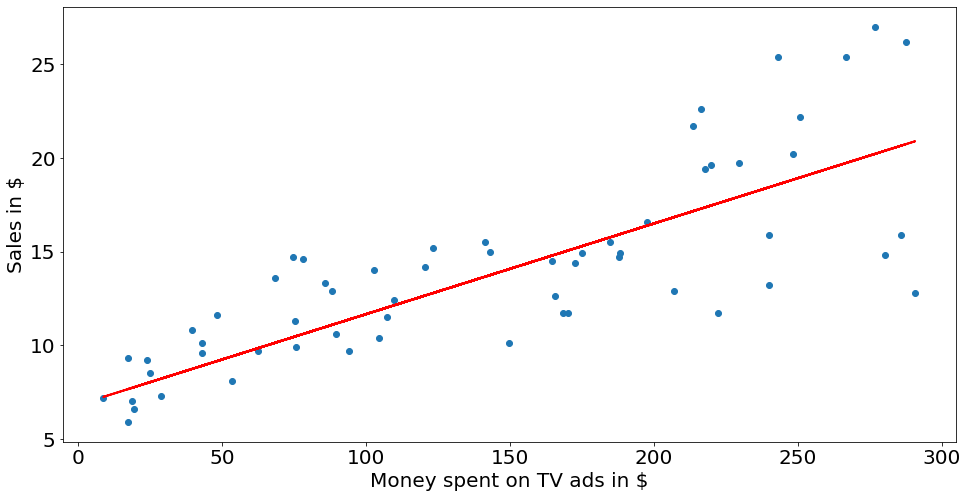

In [14]:
plt.figure(figsize=(16, 8))
plt.rc('font', size=20)
plt.scatter(x=x_test, y=y_test)
plt.plot(x_test, predictions, color='red', linewidth=2)
plt.xlabel("Money spent on TV ads in $")
plt.ylabel("Sales in $",)
plt.show()

In [15]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error= ", rmse)

Root Mean Squared Error=  3.1107990284324796


In [16]:
r2 = r2_score(y_test, predictions)
print("R2 score= ", r2)

R2 score=  0.6099152137010471


## Logistic Regression

### Importing libraries

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [19]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [20]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [21]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [22]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [23]:
print(model.classes_)

[0 1]


In [24]:
print(model.intercept_)

[-1.04608067]


In [25]:
print(model.coef_)

[[0.51491375]]


In [26]:
print(model.predict_proba(x))

[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]


In [27]:
print(model.predict(x))

[0 0 0 1 1 1 1 1 1 1]


In [28]:
print(model.score(x, y))

0.9


In [29]:
cm = confusion_matrix(y, model.predict(x))

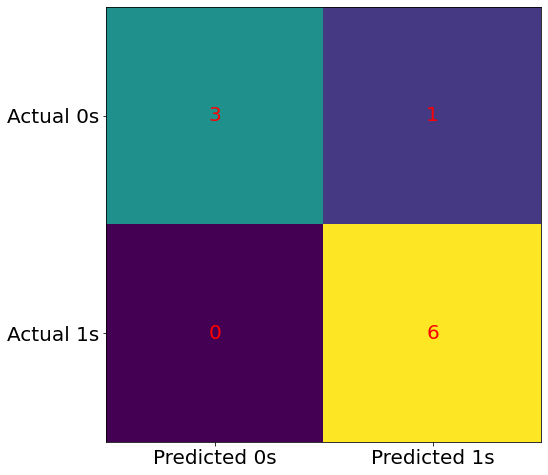

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [31]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

